In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Goal: Understanding the dataset

In [70]:
df = pd.read_csv('Amazon_Sale_Report.csv')
df.head(5)

C:\Users\gayen\AppData\Local\Temp\ipykernel_10268\3642047402.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon_Sale_Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Structure of the dataset

In [71]:
# Rows, columns
df.shape

(128975, 24)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [73]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

Deal with empty values

In [74]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [75]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [76]:
df_filled = df.fillna(0)



1. Sales Performance

C:\Users\gayen\AppData\Local\Temp\ipykernel_10268\3533863517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


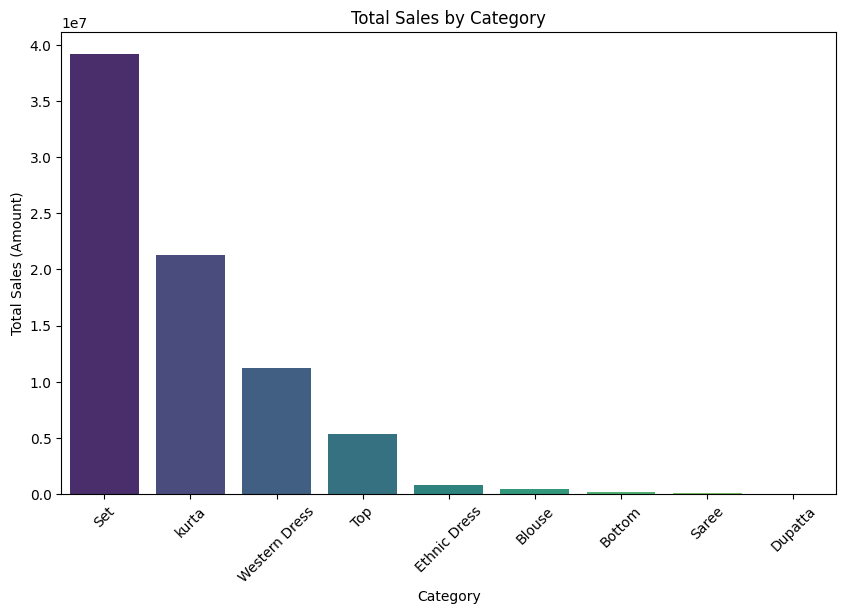

In [77]:
# Total sales (sum of amount) grouped by category

category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.show()

2. Sales Trends Over Time

C:\Users\gayen\AppData\Local\Temp\ipykernel_10268\1261135595.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Date'] = pd.to_datetime(df_filled['Date'])
C:\Users\gayen\AppData\Local\Temp\ipykernel_10268\1261135595.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_filled.set_index('Date')['Amount'].resample('M').sum()


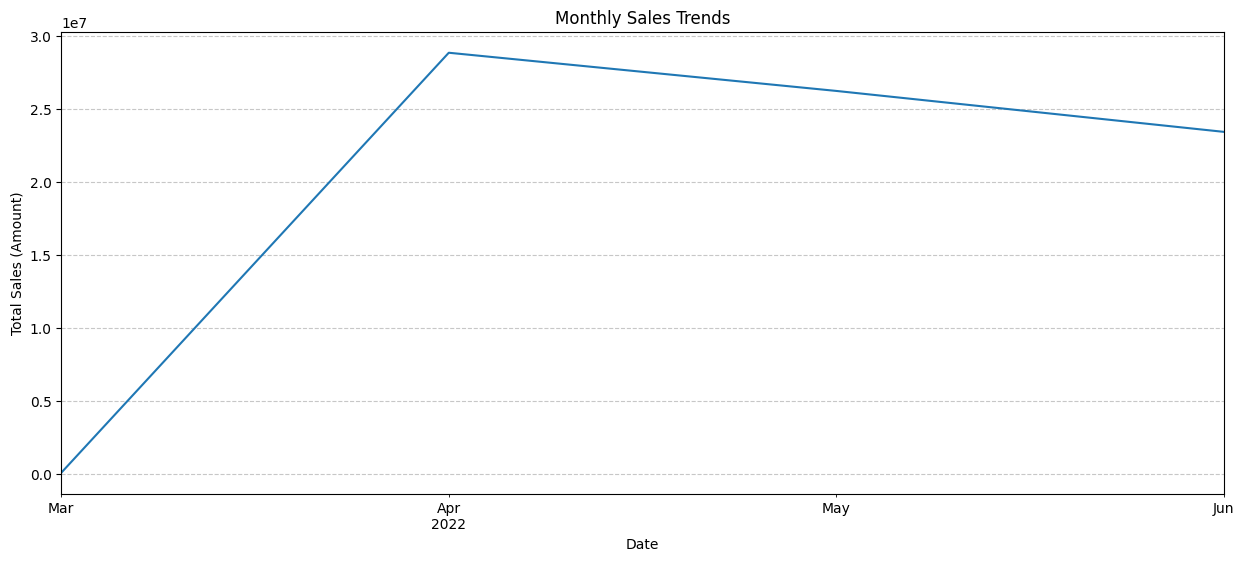

In [78]:
df_filled['Date'] = pd.to_datetime(df_filled['Date'])
monthly_sales = df_filled.set_index('Date')['Amount'].resample('M').sum()
plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales (Amount)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

3. FulFillment Status

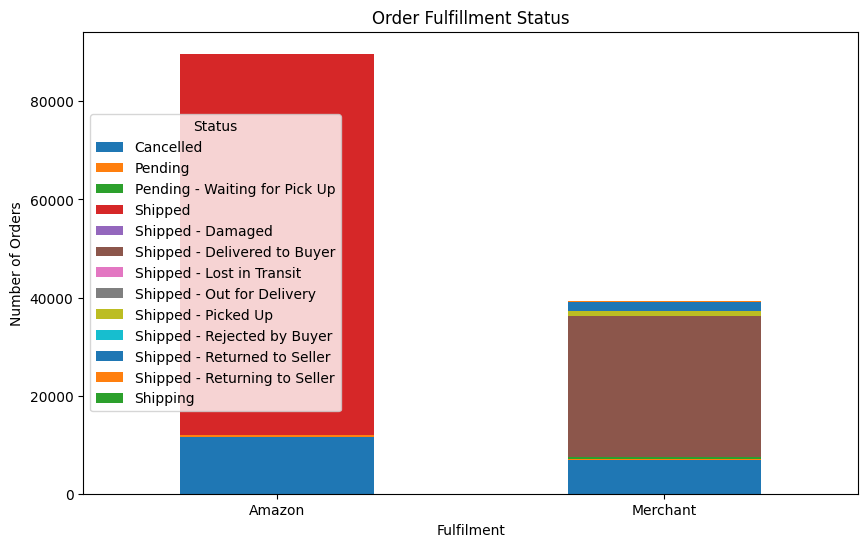

In [79]:
fulfillment_status = pd.crosstab(df_filled['Fulfilment'], df_filled['Status'])
fulfillment_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Order Fulfillment Status')
plt.xlabel('Fulfilment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

- **Set** and **Kurta** are your top-selling categories. Allocate more resources (inventory, marketing, promotions) to these categories to maximize revenue.
- **Actions**:
  - Increase stock levels for **Set** and **Kurta** to avoid stockouts.
  - Run targeted marketing campaigns (e.g., social media ads, email campaigns) to promote these categories further.
  - Introduce new designs or variations in these categories to keep customers engaged.

- **Western Dress**, **Top**, and **Ethnic Dress** are mid-performing categories. Investigate why they are not performing as well as **Set** and **Kurta**.
- **Actions**:
  - Conduct customer surveys or focus groups to understand preferences and pain points.
  - Optimize pricing, product descriptions, and images to make these categories more appealing.
  - Bundle mid-performing items with top-selling items (e.g., offer a **Set** with a **Dupatta** at a discounted price).

### **Actionable Insights and Strategies**

#### **1. Leverage Seasonal Trends**

**March-April Spike**:
- Capitalize on the high demand during this period by:
  - Increasing inventory for popular products.
  - Launching targeted promotions (e.g., discounts, bundles).
  - Running festive or seasonal marketing campaigns.

**Post-April Decline**:
- Plan for the off-peak season by:
  - Introducing new products or collections to maintain customer interest.
  - Offering off-season discounts to clear excess inventory.